    # <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Оценки параметров.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 50 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [71]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/estimators.html">ноутбук</a> с занятия по оценкам параметров.


---
### Задача 1.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

Выводить характеристики вероятностных распределений (мат. ожидание, дисперсия) не требуется.


---
### Задача 2.

Являются ли сильно состоятельными оценки, полученные в предыдущей задаче?

Для равномерного распределения *достаточно* выполнить визуальную проверку, в остальных случаях &mdash; *необходимо* привести теоретическое доказательство, используя известные вам теоретические утверждения.

Визуализируем полученную оценку для $U(a,b),\ \theta=(a,b).$ А именно, $\ \widehat{\theta}=\left(\ \overline{X}-\sqrt3\cdot\sqrt{\overline{X^2}-\overline{X}^2},\ \ \overline{X}+\sqrt3\cdot\sqrt{\overline{X^2}-\overline{X}^2}\ \right) = \left(\widehat{a},\ \widehat{b}\right)$. Для исследования возьмём $U(0, 1)$.

In [73]:
sample_size = 1000  # размер выборки
samples_count = 1000  # количество выборок
samples = np.random.uniform(low=0, high=1, size=(samples_count, sample_size))

# Считаем оценки
mu1 = samples.cumsum(axis=1) / (np.arange(sample_size) + 1)  # среднее каждой подвыборки (первый момент)
mu2 = (np.square(samples)).cumsum(axis=1) / (np.arange(sample_size) + 1)  # средний квадрат каждой подвыборки (второй момент)
sq = np.sqrt(3) * np.sqrt(mu2 - np.square(mu1))
a = mu1 - sq  # a с крышкой
b = mu1 + sq  # b с крышкой

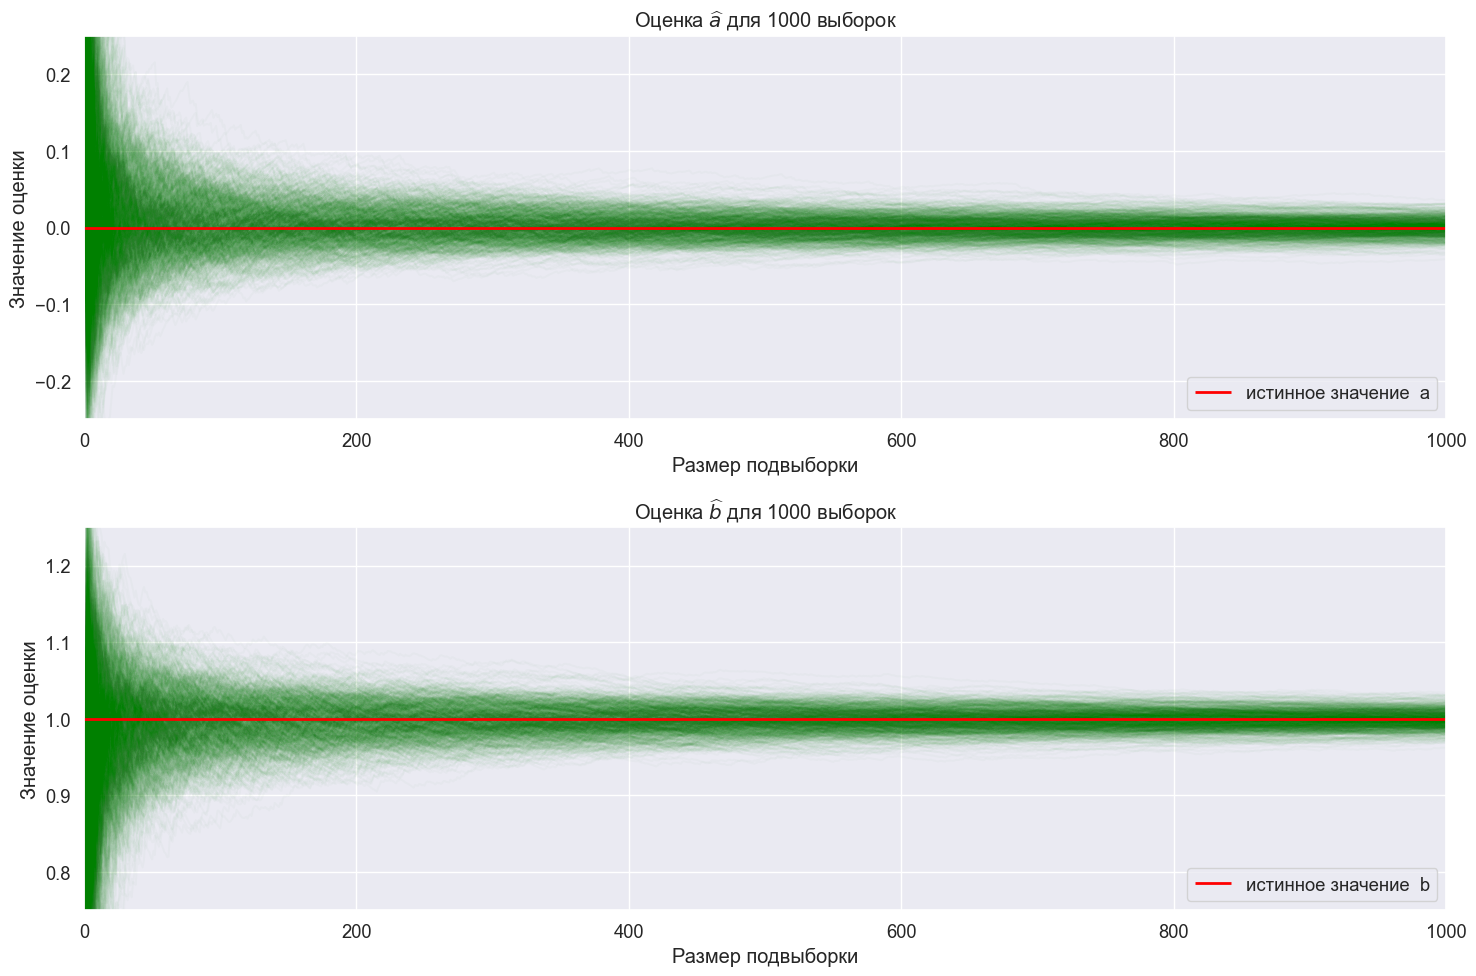

In [74]:
plt.figure(figsize=(15, 10))
coordinate = ['a', 'b']

for j, theta in enumerate([a, b]):
    plt.subplot(2, 1, j+1)

    # рисуем для каждой выборки отдельно
    for i in range(samples_count):
        plt.plot(np.arange(sample_size) + 1, theta[i], color='green', alpha=0.02)

    plt.hlines(j, 0, sample_size, color='red', alpha=1, lw=2, label='истинное значение  ' + str(coordinate[j]))
    plt.xlim((0, sample_size))
    plt.ylim((j-0.25, j+0.25))
    plt.xlabel('Размер подвыборки')
    plt.ylabel('Значение оценки')
    plt.title('Оценка $\\widehat{' + str(coordinate[j]) + '}$ для 1000 выборок')
    plt.legend(loc='lower right');

plt.tight_layout()  # чтобы графики не перекрывались

##### Выводы:
 Построенные графики демонстрируют, что для оценок обоих параметров выполняется сходимость почти всюду $\widehat{a}\to a\ $ и $\ \widehat{b}\to b$ при $n\to\infty$ (размер выборки). Значит, оценка сильно состоятельная.

---
### Задача 3.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

 ---
### Задача 4.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:**  Из полученного в решении задачи 3 заключаем, что оценка $S^2$ - смещённая, а $\frac{n}{n-1}S^2$ - несмещённая.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/lecture2_2.pdf">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`, отправляя также html-версию графика.

In [75]:
'''

# Вначале:
plt.figure(figsize=<размер>)

# Для каждой оценки:
# y - номер оценки
plt.scatter(<независимые оценки> , np.zeros(k) + y,
            alpha=0.1, s=100, color=<цвет>, label=<метка>)
plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200,
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
plt.title(f'Размер выборки = {n}')
plt.yticks([])
plt.legend()

''';

Возьмём $\sigma=5$:

**Решение:**

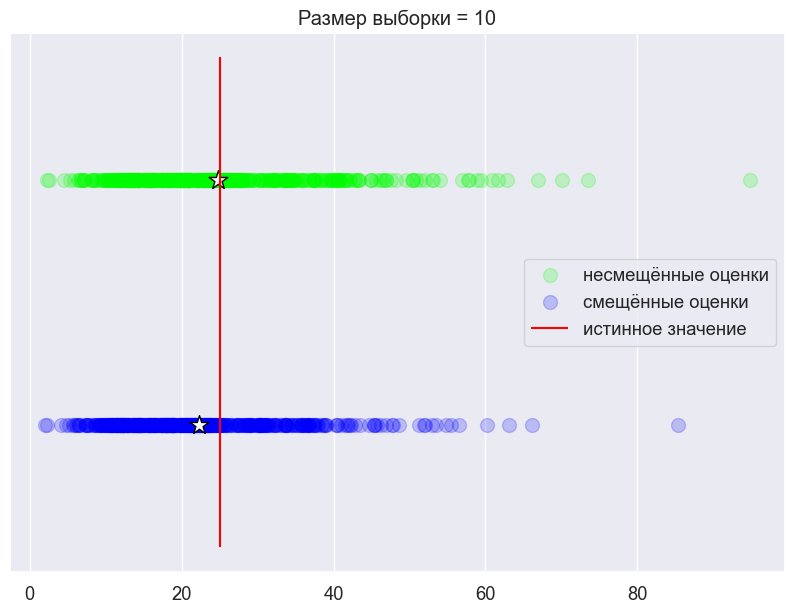

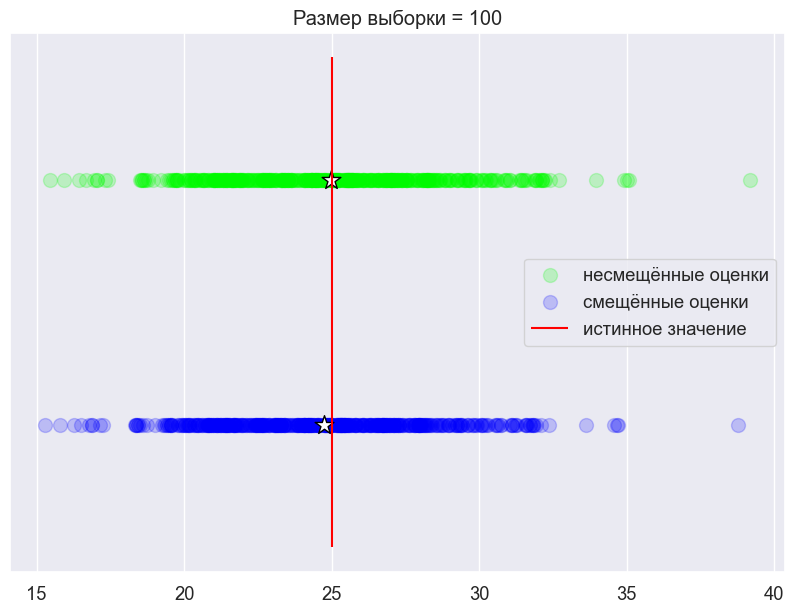

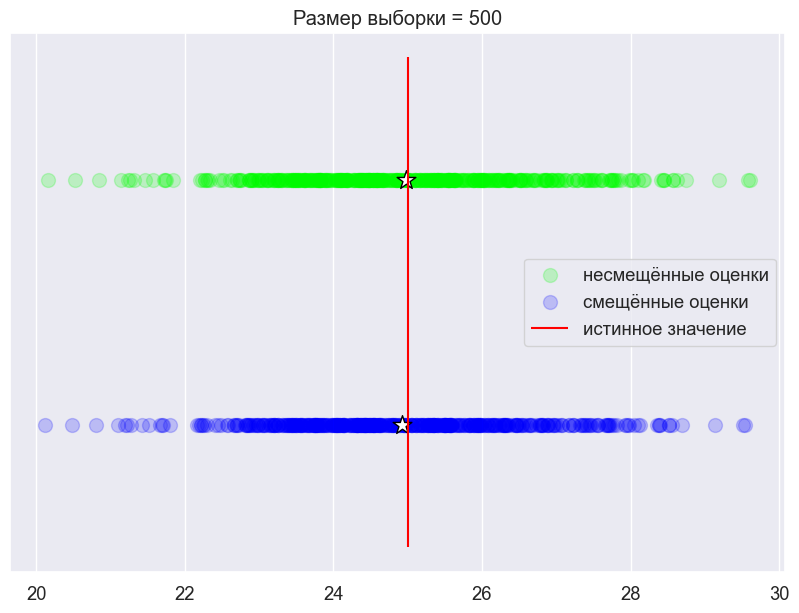

In [76]:
sizes = {10, 100, 500}
k = 500  # количество выборок

for n in sizes:  # размер выборки
    samples = np.random.normal(loc=0, scale=5, size=(k, n))
    mu1 = samples.mean(axis=1)  # среднее выборки (первый момент)
    mu2 = np.square(samples).mean(axis=1)  # средний квадрат выборки (второй момент)
    S = mu2 - mu1*mu1  # смещённые оценки sigma
    S_fixed = S * n/(n-1)  # несмещённые оценки sigma

    plt.figure(figsize=(10,7))

    # Для каждой оценки:
    # y - номер оценки
    y = 1
    plt.scatter(S_fixed, np.zeros(k) + y, alpha=0.2, s=100, color='lime', label='несмещённые оценки')
    plt.scatter(S_fixed.mean(), y, marker='*', s=200, color='white', edgecolors='black')

    y = 0
    plt.scatter(S, np.zeros(k) + y, alpha=0.2, s=100, color='blue', label='смещённые оценки')
    plt.scatter(S.mean(), y, marker='*', s=200, color='white', edgecolors='black')

    # Для всего графика:
    plt.vlines(25, -0.5, 1.5, color='red', label='истинное значение')
    plt.title(f'Размер выборки = {n}')
    plt.yticks([])
    plt.legend(loc='center right')

Из построенных графиков видно, во-первых, то, что оценка $S^2$ действительно смещённая. Это особенно наглядно для выборок небольшого размера(в нашем случае размера 10) -- в этом случае несмещённая выборка практически совпадает с истинным значением, в то время как смещённая -- нет. Для выборок большого размера(в нашем случае 500) видно, что обе оценки почти совпали с истинным значением, а значит, мало отличаются друг от друга, что вполне понятно:  при $n\to\infty\ $ имеем $\ \frac{n}{n-1}S^2\to S^2$

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено.

Возьмём выборки размера $n=500$

**Решение:**

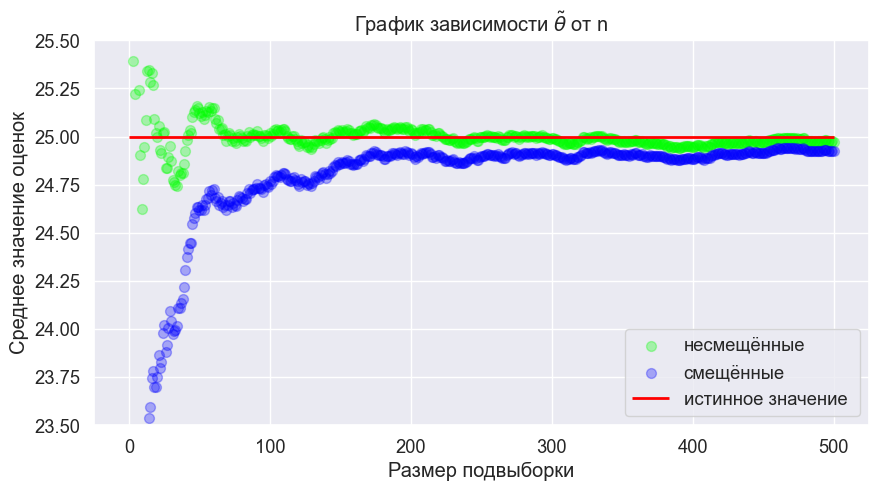

In [77]:
n = 500  # размер выборки
k = 500  # количество выборок

samples = np.random.normal(loc=0, scale=5, size=(k, n))
mu1 = samples.cumsum(axis=1) / (np.arange(n) + 1)  # среднее каждой подвыборки (первый момент)
mu2 = (np.square(samples)).cumsum(axis=1) / (np.arange(n) + 1)  # средний квадрат каждой подвыборки (второй момент)
S = mu2 - np.square(mu1)  # смещённые оценки sigma
S_fixed = np.zeros(shape=(k, n))
S_fixed[:, 1:] = (S[:, 1:] * (np.arange(n-1) + 2)) / (np.arange(n-1) + 1);  # несмещённая оценка sigma
# первый столбец посчитался бы некорректно(деление на нуль) - оставим его нулевым(квадрат единственного элемента выборки минус этот элемент в квадрате)


plt.figure(figsize=(10,5))

# Для каждой оценки:
plt.scatter(y=S_fixed.mean(axis=0), x=np.arange(n) + 1, alpha=0.3, s=50, color='lime', label='несмещённые')
plt.scatter(y=S.mean(axis=0), x=np.arange(n) + 1, alpha=0.3, s=50, color='blue', label='смещённые')

plt.ylim(23.5, 25.5)
plt.hlines(25, 0, n, color='red', alpha=1, lw=2, label='истинное значение ')
plt.xlabel('Размер подвыборки')
plt.ylabel('Среднее значение оценок')
plt.title('График зависимости $\\tilde{\\theta}$ от n')
plt.legend(loc='lower right');

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

**Вывод:** 

Несмещённая оценка - это такая, матожидание которой равно истинному оцениваемому значению. Проведённое исследование подтверждает свойство несмещённости для оценки $\frac{n}{n-1}S^2$.
 С ростом размера выборки разница между истинным значением и матожиданием несмещённой оценки всё меньше заметна. Из полученных результатов заключаем, что несмещённая оценка дисперсии есть $\frac{n}{n-1}S^2=\frac{n}{n-1}\cdot\frac{1}{n}\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2=\frac{1}{n-1}\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2.$ Отсюда понятно, что при подобных оценках погрешностей(не обязательно для дисперсии, разумеется, но как минимум в данном случае) в знаменателе ставят $n-1,$  а не $n$.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.